<a href="https://colab.research.google.com/github/danisimoneaux/IS4487/blob/main/Lab12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics  #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix

In [3]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/megatelco.csv')

Mounted at /content/gdrive


In [4]:
df.head(10) 

,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,id
0,one,23859,70,0,519105,154,5.0,8,low,low,yes,LEAVE,8183
1,zero,72466,67,16,271182,262,5.0,5,low,low,yes,LEAVE,12501
2,zero,30883,60,0,647281,211,3.0,8,low,low,yes,STAY,7425
3,one,44512,0,22,754958,232,0.0,5,low,low,no,LEAVE,13488
4,zero,70535,0,0,653421,310,0.0,14,low,low,yes,STAY,11389
5,zero,143987,0,56,896544,778,5.0,1,low,high,yes,STAY,14674
6,one,96668,79,24,259329,365,5.0,6,low,avg,yes,LEAVE,19100
7,one,50083,0,0,160335,266,5.0,10,low,high,yes,STAY,18170
8,one,104392,0,0,247836,778,1.0,8,high,low,no,LEAVE,3201
9,one,37852,0,74,264893,857,0.0,2,low,low,yes,LEAVE,12612


In [6]:
#Clean Data
df1 = df[(df['house'] > 0) & (df['income'] > 0) & (df['handset_price'] < 1000)]
df1 = df1.dropna() 

df1.describe()

,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,id
count,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000,4994.000000
mean,79911.270525,85.114738,24.244694,493946.252903,387.616340,7.739287,5.957549,10032.925110
std,41683.689543,85.610045,26.844259,253599.007645,213.659555,8.802897,4.389439,5815.013219
min,20028.000000,0.000000,0.000000,150305.000000,130.000000,0.000000,1.000000,2.000000
25%,41591.500000,0.000000,0.000000,260741.500000,219.000000,1.000000,2.000000,4943.000000
50%,74962.500000,59.000000,15.000000,452087.500000,322.000000,4.000000,5.000000,10124.000000
75%,115497.000000,177.000000,42.000000,701612.250000,528.000000,14.000000,9.000000,15082.750000
max,159938.000000,335.000000,89.000000,1000000.000000,899.000000,29.000000,15.000000,20000.000000


Create Factors

In [7]:
df1.loc[df1['reported_satisfaction'] == 'low', 'reported_satisfaction'] = "1"
df1.loc[df1['reported_satisfaction'] == 'avg', 'reported_satisfaction'] = "2"
df1.loc[df1['reported_satisfaction'] == 'high', 'reported_satisfaction'] = "3"
df1.loc[df1['reported_usage_level'] == 'low', 'reported_usage_level'] = "1"
df1.loc[df1['reported_usage_level'] == 'avg', 'reported_usage_level'] = "2"
df1.loc[df1['reported_usage_level'] == 'high', 'reported_usage_level'] = "3"

In [8]:
df1.loc[df1['college'] == 'one', 'college'] = "1" 
df1.loc[df1['college'] == 'zero', 'college'] = "0"

In [9]:
df1.loc[df1['considering_change_of_plan'] == 'yes', 'considering_change_of_plan'] = "1"
df1.loc[df1['considering_change_of_plan'] == 'no', 'considering_change_of_plan'] = "0"
df1.loc[df1['considering_change_of_plan'] == 'maybe', 'considering_change_of_plan'] = "0.5"

In [10]:
df1['college'] = df1['college'].astype('int') 
df1['reported_satisfaction'] = df1['reported_satisfaction'].astype('int') 
df1['reported_usage_level'] = df1['reported_usage_level'].astype('int') 
df1['considering_change_of_plan'] = df1['considering_change_of_plan'].astype('float')

In [11]:
#Binary for Leave/Stay
df1['leave_flag'] = df1['leave'].str.replace('STAY','0')  
df1['leave_flag'] = df1['leave_flag'].str.replace('LEAVE','1')
df1['leave_flag'] = df1['leave_flag'].astype('int')
df1['leave_flag'] = df1['leave_flag'].astype('bool')

In [12]:
#Create Factors
df1['leave'] = df1['leave'].astype('category')
df1['college'] = df1['college'].astype('category')
df1['reported_satisfaction'] = df1['reported_satisfaction'].astype('category')
df1['reported_usage_level'] = df1['reported_usage_level'].astype('category')
df1['considering_change_of_plan'] = df1['considering_change_of_plan'].astype('category')

In [13]:
#Profit
276 * (800-200) - 310 * 200

df1[['id','leave']].groupby('leave').count()*0.2

for i in np.arange(0,1,0.01):
  curList = df1[['id','leave']].groupby('leave').count()*i
  print(curList)

        id
leave     
LEAVE  0.0
STAY   0.0
          id
leave       
LEAVE  24.68
STAY   25.26
          id
leave       
LEAVE  49.36
STAY   50.52
          id
leave       
LEAVE  74.04
STAY   75.78
           id
leave        
LEAVE   98.72
STAY   101.04
          id
leave       
LEAVE  123.4
STAY   126.3
           id
leave        
LEAVE  148.08
STAY   151.56
           id
leave        
LEAVE  172.76
STAY   176.82
           id
leave        
LEAVE  197.44
STAY   202.08
           id
leave        
LEAVE  222.12
STAY   227.34
          id
leave       
LEAVE  246.8
STAY   252.6
           id
leave        
LEAVE  271.48
STAY   277.86
           id
leave        
LEAVE  296.16
STAY   303.12
           id
leave        
LEAVE  320.84
STAY   328.38
           id
leave        
LEAVE  345.52
STAY   353.64
          id
leave       
LEAVE  370.2
STAY   378.9
           id
leave        
LEAVE  394.88
STAY   404.16
           id
leave        
LEAVE  419.56
STAY   429.42
           id
leave        


In [14]:
494 * (800-200) - 505 * 200

195400

In [15]:
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x = df1[['income','house','college','overage','leftover','handset_price','over_15mins_calls_per_month','average_call_duration']] #,'reported_satisfaction','reported_usage_level','considering_change_of_plan']]
y = df1['leave_flag']

#place 20% of data in a test dataframe
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [16]:
megatelco_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Create Decision Tree Classifer
megatelco_tree = megatelco_tree.fit(x_train,y_train)

# Use the tree to predict "leave"
y_predict = megatelco_tree.predict(x_test)

megatelco2_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Create Decision Tree Classifer
megatelco2_tree = megatelco2_tree.fit(x_train,y_train)

# Use the tree to predict "leave"
y_predict2 = (megatelco2_tree.predict_proba(x_test)[:,1] >= 0.2)


# create a confusion matrix
megatelco2_matrix = confusion_matrix(y_test, y_predict2)
print(megatelco2_matrix)


[[ 82 436]
 [ 17 464]]


[Text(0, 0.5, 'Stay'), Text(0, 1.5, 'Leave')]

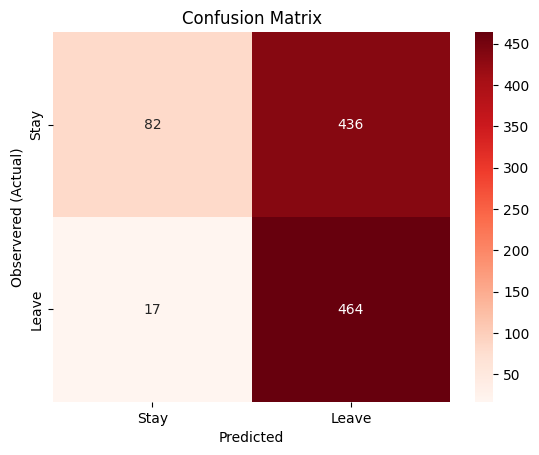

In [17]:
import seaborn as sns

#Create a heatmap from our confusion matrix
cm = sns.heatmap(megatelco2_matrix , annot=True, fmt='d',cmap='Reds')

cm.set_title('Confusion Matrix');
cm.set_xlabel('Predicted')
cm.set_ylabel('Observered (Actual)');

cm.xaxis.set_ticklabels(['Stay','Leave'])
cm.yaxis.set_ticklabels(['Stay','Leave'])


In [ ]:
( 433 * (800-200)) - (340 * 200)

Model stayed the same.